# 1. PURPOSE  : 
## Predict  whether clients experience financial distress in the next two years or not       (predict "SeriousDlqin2yrs" = 1 or 0 ) 

# 2. PROCESS :
## DATA EXTRACTION -> DATA CLEANING -> FEATURE ENGINEERING -> TRAIN DATA LEARNING -> MODEL CREATING -> TEST DATA PREDICTION 

In [1]:
import pandas as pd, numpy as np
%matplotlib inline
%pylab inline
import seaborn  as sns 
from sklearn.datasets import load_boston
import pylab as pl
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# DATA EXTRACTION

In [7]:
cd /Users/GGV/Desktop/kaggle/give_me_some_credit/

/Users/GGV/Desktop/kaggle/give_me_some_credit


In [105]:
cs_training=pd.read_csv('cs-training.csv')
cs_test=pd.read_csv('cs-test.csv')
sampleEntry=pd.read_csv('sampleEntry.csv')
Data_Dictionary=pd.read_excel('Data_Dictionary.xls')

# DATA CLEANING 

In [40]:
# replace null in MonthlyIncome as MonthlyIncome's average
# replace null in NumberOfDependents as 0

cs_training['MonthlyIncome'] = cs_training['MonthlyIncome'].fillna(cs_training['MonthlyIncome'].mean())
cs_training['NumberOfDependents'] = cs_training['NumberOfDependents'].fillna(0)

cs_training.index= cs_training['Unnamed: 0']
cs_training = cs_training.drop('Unnamed: 0', 1)


In [49]:
# fliter  DebtRatio < 0.9 percentile 
# fliter  RevolvingUtilizationOfUnsecuredLines < 0.9  percentile
# fliter  MonthlyIncome < 0.9 percentile

cs_training =cs_training[cs_training['DebtRatio'] < cs_training['MonthlyIncome'].quantile(.9)]
cs_training =cs_training[cs_training['RevolvingUtilizationOfUnsecuredLines'] < cs_training['RevolvingUtilizationOfUnsecuredLines'].quantile(.9)]
cs_training =cs_training[cs_training['MonthlyIncome'] < cs_training['MonthlyIncome'].quantile(.9)]

In [50]:
len(cs_training)
#cs_training[cs_training['MonthlyIncome'] < cs_training['MonthlyIncome'].quantile(1)]

109047

In [52]:
#cs_training.info()

# FEATURE ENGINEERING 

# TRAIN DATA LEARNING 

In [53]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier

In [55]:
X = cs_training[['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']]
Y= np.array(cs_training['SeriousDlqin2yrs'])

In [56]:
clf = RF(n_estimators=10)

X_train, X_test, y_train, y_test = train_test_split(X, Y)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9623285158829139

In [57]:
confusion_matrix(clf.predict(X_test), y_test, labels=[1,0])

array([[   59,    85],
       [  942, 26176]])

ROC AUC: 0.72


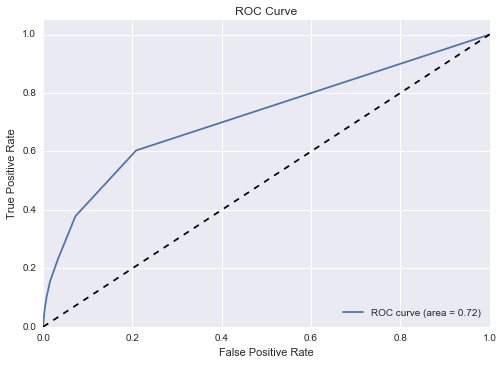

In [58]:
# ROC curve
# shuffle and split training and test sets
# Determine the false positive and true positive rates


fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# MODEL CREATING

# TEST DATA PREDICTION

In [106]:
cs_test.columns=['Id', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

In [107]:
cs_test_=pd.merge(cs_test,sampleEntry,on='Id')

In [108]:
cs_test_.head()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Probability
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0,0.080807
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0,0.040719
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0,0.011968
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0,0.067640
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0,0.108264


In [109]:
cs_test_=cs_test_.drop('SeriousDlqin2yrs', 1)
cs_test_=cs_test_.dropna()
cs_test_.head()

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Probability
0,1,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0,0.080807
1,2,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0,0.040719
2,3,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0,0.011968
3,4,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0,0.067640
4,5,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0,0.108264


In [110]:
len(cs_test_)

81400

In [61]:
sampleEntry.head()

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264


In [111]:
X2 = cs_test_[['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']]
y2=cs_test_['Probability']

In [112]:
clf.predict(X2)

array([0, 0, 0, ..., 0, 0, 0])

In [113]:
clf.score(X2,y2)

ValueError: Can't handle mix of continuous and binary

In [125]:
Y

array([0, 0, 0, ..., 0, 0, 0])

In [121]:
pd.DataFrame(clf.predict_proba(X2))

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.9,0.1
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,0.9,0.1
8,0.4,0.6
9,1.0,0.0


In [78]:
len(pd.DataFrame(clf.predict_proba(X2)))

81400

In [79]:
len(sampleEntry)

101503

In [122]:
(clf.predict_proba(X2))

array([[ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       ..., 
       [ 1. ,  0. ],
       [ 0.7,  0.3],
       [ 0.9,  0.1]])